In [1]:
# Imports and plotting setups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

import math_funcs

from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
    #e,           # Elementary charge
    #h,           # Planck constant
    #hbar,        # Reduced Planck constant (h-bar)
    k,           # Boltzmann constant
    #G,           # Newtonian constant of gravitation
    #m_e,         # Electron mass
    #m_p,         # Proton mass
    #m_n,         # Neutron mass
    #alpha,       # Fine-structure constant
    eV,          # Electron volt
)

$T_{B_{\alpha}}=\frac{4\pi T_{A}}{\sum_{\alpha=v,h}\underset{4\pi}{\iint}D_{\alpha}\left(\theta_{a},\phi_{a},\theta,\phi,f\right)W\bigg(\pi-\theta,\phi-\pi,f,z=-d\bigg)d\Omega}$

C:\Users\Jake Sahli\AppData\Local\Temp\ipykernel_15588\378357071.py:57: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))
C:\Users\Jake Sahli\AppData\Local\Temp\ipykernel_15588\378357071.py:57: RuntimeWarning: overflow encountered in multiply
  plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))


Text(0.5, 1.0, 'Northern UV Projection of Vertical Brightness Temperature Low Band')

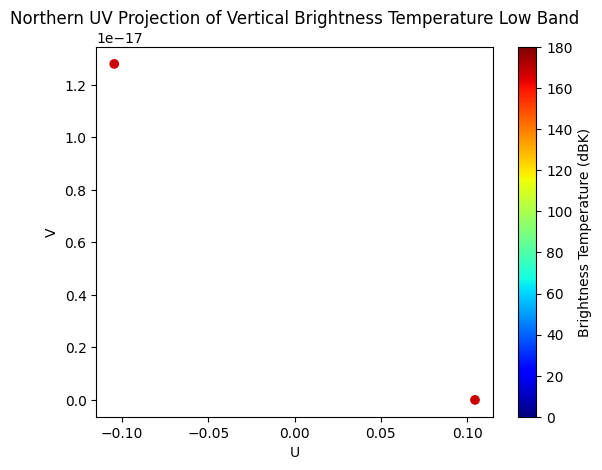

In [2]:
from T_B_Europan_sky import angle_grid
from antenna_patterns import hf_antenna

#Define coldspace, jovian, gal radiation field for a mission 
T_A_J_low_band = 10**11 #K
T_A_J_high_band = 10**2 # K
T_A_gal_low_band = 10**7 # K
T_A_gal_high_band = T_A_J_high_band

T_B_coldspace = 2.7 #K

# Define the theta and phi fine sampling grid
ag = angle_grid(1, 1)
theta, phi, \
    phi_grid, theta_grid  = ag.get_angle_grid()

W_v = np.zeros_like(theta_grid, dtype=float).flatten()
W_h = np.zeros_like(theta_grid, dtype=float).flatten()

# Deconvolution requires definition of a weighting pattern
# Sub Jovian point
for i in np.arange(theta_grid.size):
    theta = theta_grid.flatten()[i]
    phi = phi_grid.flatten()[i]
    # DAM radiation illumination 
    # from aural regions of jupiter visible only 1 degree
    # And only at the low band
    if theta == 6:
        if phi == 0 or phi == 180:
            W_v[i] = 1 * 0.5
            W_h[i] = 1 * 0.5

# Integrate the weighting pattern and the directivity 
# of the antenna from the Cecconi paper
sum_v = 0 
sum_h = 0
for i in np.arange(theta_grid.size):
    theta = theta_grid.flatten()[i]
    phi = phi_grid.flatten()[i]
    
    dsteradians = np.abs(np.sin(theta)) * ag.dtheta_rad * ag.dphi_rad
    sum_v += W_v[i] * (3/2) * (np.sin(theta))**2 * dsteradians
    sum_h += W_h[i] * (3/2) * (np.sin(theta))**2 * dsteradians

T_Bv = W_v * 4 * np.pi * T_A_J_low_band / sum_v
T_Bh = W_h * 4 * np.pi * T_A_J_low_band / sum_h


# Plot only the Northern Hemisphere of the brightness temperature
theta_grid_rad = np.deg2rad(theta_grid)
phi_grid_rad = np.deg2rad(phi_grid)

U = (np.sin(theta_grid_rad[0:91]) * np.cos(phi_grid_rad[0:91])).flatten()
V = (np.sin(theta_grid_rad[0:91]) * np.sin(phi_grid_rad[0:91])).flatten()

plt.figure()
plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))
    , cmap='jet', vmin=0, vmax=180)
plt.colorbar(label='Brightness Temperature (dBK)')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Northern UV Projection of Vertical Brightness Temperature Low Band')


C:\Users\Jake Sahli\AppData\Local\Temp\ipykernel_15588\4285067826.py:51: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))
C:\Users\Jake Sahli\AppData\Local\Temp\ipykernel_15588\4285067826.py:51: RuntimeWarning: overflow encountered in multiply
  plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))


Text(0.5, 1.0, 'Northern UV Projection of Vertical Brightness Temperature Low Band')

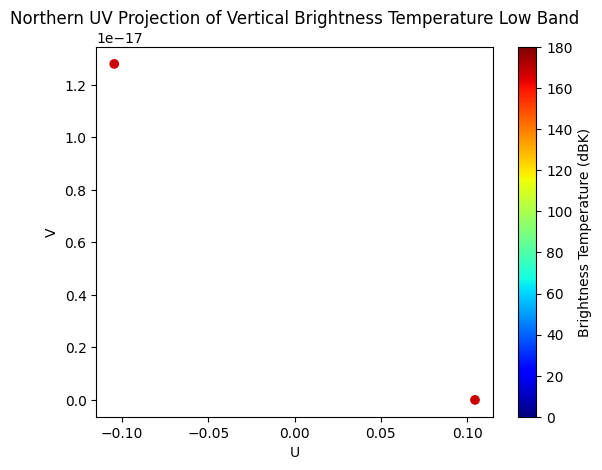

In [3]:
def deconvolve_Cecconi_T_A_to_T_B(ag, W_h, W_v, T_A):
    # Integrate the weighting pattern and the directivity 
    # of the antenna from the Cecconi paper
    sum_v = 0 
    sum_h = 0
    for i in np.arange(theta_grid.size):
        theta = theta_grid.flatten()[i]
        phi = phi_grid.flatten()[i]
        
        dsteradians = np.abs(np.sin(theta)) * ag.dtheta_rad * ag.dphi_rad
        
        sum_v += W_v[i] * (3/2) * (np.sin(theta))**2 * dsteradians
        sum_h += W_h[i] * (3/2) * (np.sin(theta))**2 * dsteradians

    T_Bv = W_v * 4 * np.pi * T_A / sum_v
    T_Bh = W_h * 4 * np.pi * T_A / sum_h
    
    return T_Bv, T_Bh

# Define the theta and phi fine sampling grid
ag = angle_grid(1, 1)
theta, phi, \
    phi_grid, theta_grid  = ag.get_angle_grid()

W_v = np.zeros_like(theta_grid, dtype=float).flatten()
W_h = np.zeros_like(theta_grid, dtype=float).flatten()

# Deconvolution requires definition of a weighting pattern
# Sub Jovian point
for i in np.arange(theta_grid.size):
    theta = theta_grid.flatten()[i]
    phi = phi_grid.flatten()[i]
    # DAM radiation illumination 
    # from aural regions of jupiter visible only 1 degree
    # And only at the low band
    if theta == 6:
        if phi == 0 or phi == 180:
            W_v[i] = 1 * 0.5
            W_h[i] = 1 * 0.5
            
T_Bv, T_Bh = deconvolve_Cecconi_T_A_to_T_B(ag, W_h, W_v, T_A_J_low_band)

# Plot only the Northern Hemisphere of the brightness temperature
theta_grid_rad = np.deg2rad(theta_grid)
phi_grid_rad = np.deg2rad(phi_grid)

U = (np.sin(theta_grid_rad[0:91]) * np.cos(phi_grid_rad[0:91])).flatten()
V = (np.sin(theta_grid_rad[0:91]) * np.sin(phi_grid_rad[0:91])).flatten()

plt.figure()
plt.scatter(U, V, c=10 * np.nan_to_num(np.log10(T_Bv.reshape(theta_grid_rad.shape)[0:91].flatten()))
    , cmap='jet', vmin=0, vmax=180)
plt.colorbar(label='Brightness Temperature (dBK)')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Northern UV Projection of Vertical Brightness Temperature Low Band')

In [4]:
from T_B_Europan_sky import deconvolve_Cecconi_T_A_to_T_B

ag = angle_grid(1, 1)
theta, phi, \
    phi_grid, theta_grid  = ag.get_angle_grid()

# Draw the galactic background
# Low band
W_v = np.zeros_like(theta_grid, dtype=float).flatten()
W_h = np.zeros_like(theta_grid, dtype=float).flatten()

for i in np.arange(theta_grid.size):
    theta = theta_grid.flatten()[i]
    phi = phi_grid.flatten()[i]
    if theta >= 105 and theta <= 135:
        if phi >= 180 and phi <= 360:
            W_v[i] = 0.5
            W_h[i] = 0.5

T_Bv, T_Bh = deconvolve_Cecconi_T_A_to_T_B(ag, W_h, W_v, T_A_gal_low_band)

T_A = 0

for i in np.arange(theta_grid.size):
    theta = theta_grid.flatten()[i]
    phi = phi_grid.flatten()[i]

    dsteradians = np.abs(np.sin(theta)) * ag.dtheta_rad * ag.dphi_rad
    
    T_A += T_Bv[i] * (3/2) * (np.sin(theta))**2 * dsteradians
    T_A += T_Bh[i] * (3/2) * (np.sin(theta))**2 * dsteradians

T_A *= (1 / (4* np.pi))

T_A

np.float64(10000000.000000134)